In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../MachineLearning/datasets/adult.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
df.drop(columns=['workclass','education','marital.status','occupation','relationship','race','sex','native.country'],axis=1, inplace=True)

In [8]:
df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,4356,40,<=50K
1,82,132870,9,0,4356,18,<=50K
2,66,186061,10,0,4356,40,<=50K
3,54,140359,4,0,3900,40,<=50K
4,41,264663,10,0,3900,40,<=50K
...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,<=50K
32557,27,257302,12,0,0,38,<=50K
32558,40,154374,9,0,0,40,>50K
32559,58,151910,9,0,0,40,<=50K


In [9]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
df.iloc[:,-1]=lbl.fit_transform(df.iloc[:,-1])

In [10]:
df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,4356,40,0
1,82,132870,9,0,4356,18,0
2,66,186061,10,0,4356,40,0
3,54,140359,4,0,3900,40,0
4,41,264663,10,0,3900,40,0
...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0
32557,27,257302,12,0,0,38,0
32558,40,154374,9,0,0,40,1
32559,58,151910,9,0,0,40,0


(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

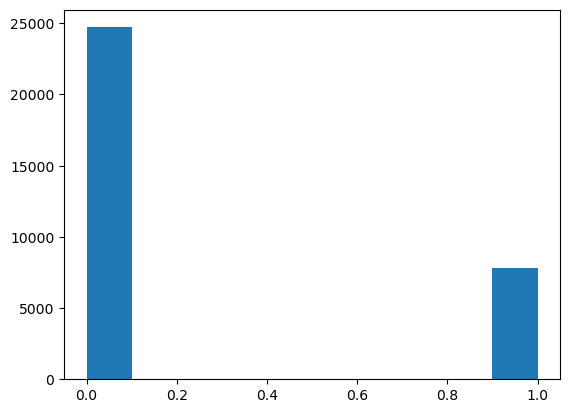

In [11]:
plt.hist(df['income'])

In [12]:
X=df.iloc[:,:-1]

In [13]:
Y=df.iloc[:,-1]

In [15]:
X

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [27]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [42]:
from sklearn.ensemble import AdaBoostClassifier
adamodel=AdaBoostClassifier(n_estimators=110,learning_rate=1)

In [43]:
adamodel.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=110)

In [44]:
y_pred=adamodel.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8334356958604594

In [56]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
ada=AdaBoostClassifier(n_estimators=200,base_estimator=logmodel,learning_rate=1)

In [57]:
model=ada.fit(X_train,Y_train)

In [58]:
y_pred=model.predict(X_test)

In [59]:
accuracy_score(Y_test,y_pred)

0.8002702370716128